
# Solar Data EDA - Benin
**Branch:** `eda_togo`
**Objective:** Clean and profile solar dataset for regional ranking
**Key Files:**
- Input: `data/togo-dapaong_qc.csv` (gitignored)
- Output: `data/clean/togo_clean.csv` (gitignored)

### 1. Setup and Loading Data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

togo_df = pd.read_csv('../data/togo-dapaong_qc.csv', parse_dates=['Timestamp'])

print(f"Togo solar data shape: {togo_df.shape}")
print(f"Togo solar data szie: {togo_df.size}")
print(f"Togo solar data columns: {togo_df.columns}")
print(togo_df.head())




Togo solar data shape: (525600, 19)
Togo solar data szie: 9986400
Togo solar data columns: Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      

### 2. describe the data to get the benin solar data stats details

In [31]:
togo_df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


### 3. benin solar data info

In [28]:
togo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-10-25 00:01:00 to 2022-10-25 00:00:00
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64


### 4. Check for duplicate timestamps

In [32]:
dup_timestamps = togo_df[togo_df.duplicated(subset=['Timestamp'], keep=False)]
print(f"Duplicate timestamps: {dup_timestamps}")

Duplicate timestamps: Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []


### 5. No duplicate, so use timestamp as index



In [33]:
togo_df.set_index('Timestamp', inplace=True)
print(togo_df.head())

                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-10-25 00:01:00      0.4  227.6      1.1  977         0            0.0   
2021-10-25 00:02:00      0.4  229.3      0.7  977         0            0.0   
2021-10-25 00:03:00      0.3  228.5      2.9  977         0            0.0   
2021-10-25 00:04:00      0.3  229.1      4.6  977         0            0.0   
2021-1

#### 6. Missing data report

In [34]:
missing = togo_df.isna().sum()

print(f"Missing values: {missing}")
threshold = 0.05 * len(benin_df)
print(f"threshold", threshold)
print("Columns with >5% missing values:\n", missing[missing > threshold])


Missing values: GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
threshold 26280.0
Columns with >5% missing values:
 Comments    525600
dtype: int64


### 7.  Z-scores

In [35]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores   = np.abs(zscore(togo_df[cols_to_check].dropna()))
print(f"z_scores: {z_scores}")

z_scores:                           GHI       DNI       DHI     ModA      ModB  \
Timestamp                                                              
2021-10-25 00:01:00  0.718859  0.602727  0.743956  0.71261  0.713042   
2021-10-25 00:02:00  0.718859  0.602727  0.743956  0.71261  0.713042   
2021-10-25 00:03:00  0.718859  0.602727  0.743956  0.71261  0.713042   
2021-10-25 00:04:00  0.718549  0.602727  0.743956  0.71261  0.713042   
2021-10-25 00:05:00  0.718549  0.602727  0.743956  0.71261  0.713042   
...                       ...       ...       ...      ...       ...   
2022-10-24 23:56:00  0.717309  0.602727  0.743956  0.71261  0.713042   
2022-10-24 23:57:00  0.717619  0.602727  0.743956  0.71261  0.713042   
2022-10-24 23:58:00  0.717929  0.602727  0.743956  0.71261  0.713042   
2022-10-24 23:59:00  0.718239  0.602727  0.743956  0.71261  0.713042   
2022-10-25 00:00:00  0.718549  0.602727  0.743956  0.71261  0.713042   

                           WS    WSgust  
Timestamp  

### 8. Outliers detection

In [36]:

outliers = (z_scores > 3).any(axis=1)
togo_df['CleaningFlag'] = outliers
print(f"outliers: {outliers}")
print(togo_df["CleaningFlag"].value_counts())
outlier_rows =togo_df[togo_df['CleaningFlag']]
outlier_rows.head()



outliers: Timestamp
2021-10-25 00:01:00    False
2021-10-25 00:02:00    False
2021-10-25 00:03:00    False
2021-10-25 00:04:00    False
2021-10-25 00:05:00    False
                       ...  
2022-10-24 23:56:00    False
2022-10-24 23:57:00    False
2022-10-24 23:58:00    False
2022-10-24 23:59:00    False
2022-10-25 00:00:00    False
Length: 525600, dtype: bool
CleaningFlag
False    516349
True       9251
Name: count, dtype: int64


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,CleaningFlag
Timestamp,,,,,,,,,,,,,,,,,,,
2021-10-28 11:06:00,1139.0,805.1,466.1,1172.0,1154.0,29.8,70.8,2.2,2.6,0.4,298.6,13.4,977,0,0.0,44.7,50.2,NaN,True
2021-10-28 18:11:00,-1.2,0.0,0.0,0.0,0.0,29.7,63.5,6.6,9.7,1.6,122.1,14.3,976,0,0.0,30.0,29.5,NaN,True
2021-10-28 18:12:00,-1.0,0.0,0.0,0.0,0.0,29.3,62.4,6.9,8.9,1.2,128.7,10.8,976,0,0.0,29.9,29.5,NaN,True
2021-10-28 18:14:00,-0.8,0.0,0.0,0.0,0.0,28.6,63.7,7.1,8.9,1.1,127.9,14.4,976,0,0.0,29.5,29.2,NaN,True
2021-10-28 18:21:00,-1.3,0.0,0.0,0.0,0.0,27.7,64.5,6.1,8.9,1.3,123.2,14.4,977,0,0.0,28.4,28.2,NaN,True


#### 9. Impute and clean

In [15]:
togo_clean = togo_df.copy()
togo_clean[cols_to_check] = togo_clean[cols_to_check].fillna(togo_clean[cols_to_check].mean())
togo_clean.head



<bound method NDFrame.head of                      GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.

### 10. save or export clean data

In [37]:
togo_clean.to_csv('../data/clean/togo_clean.csv', index=False)

### 11. Time Series Analysis

In [ ]:
flg, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
togo_clean[['GHI']].plot(ax=axs[0,0], title="GHI over Time")
togo_clean[['DNI']].plot(ax=axs[0,1], title="DNI over Time")
togo_clean[['DHI']].plot(ax=axs[1,0], title="DHI over Time")
togo_clean[['Tamb']].plot(ax=axs[1,1], title="Tamb over Time")
plt.tight_layout()

### 12 . cleaning effect

<Axes: title={'center': 'ModA & ModB: Clean vs Dirty'}, xlabel='CleaningFlag'>

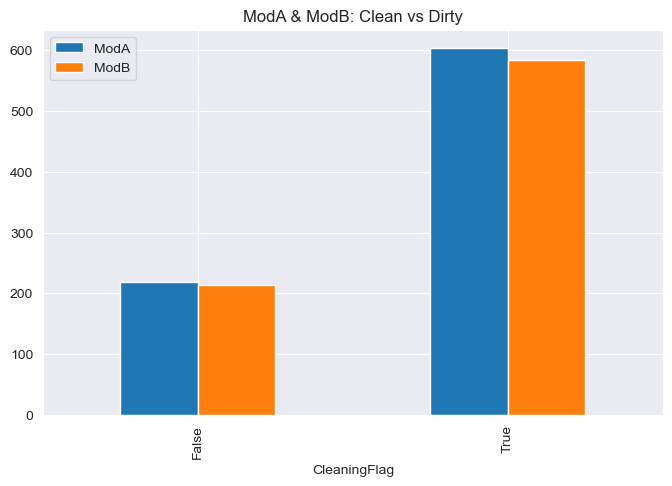

In [21]:
togo_df.groupby('CleaningFlag')[['ModA', 'ModB']].mean().plot(kind='bar', title="ModA & ModB: Clean vs Dirty", figsize=(8,5))


#### 13. Correlation Heatmap

<Axes: >

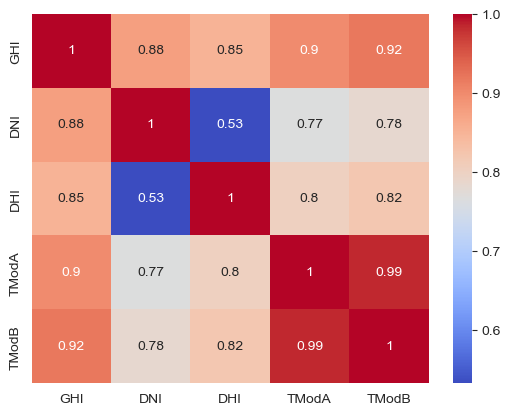

In [22]:
heat_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(togo_clean[heat_cols].corr(), annot=True, cmap='coolwarm')





### 14. Scater plot

<Axes: xlabel='WS', ylabel='GHI'>

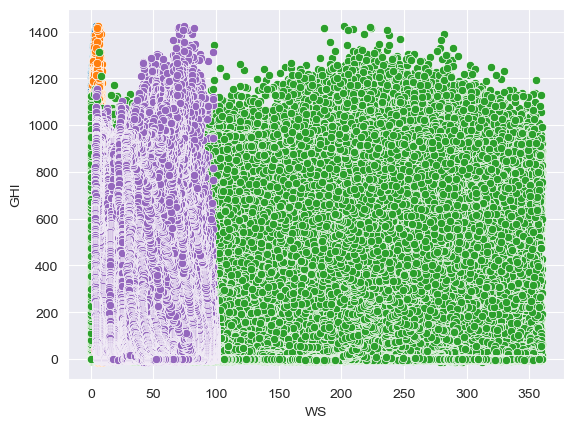

In [24]:
sns.scatterplot(data=togo_clean, x='WS', y='GHI')
sns.scatterplot(data=togo_clean, x='WSgust', y='GHI')
sns.scatterplot(data=togo_clean, x='WD', y='GHI')
sns.scatterplot(data=togo_clean, x='RH', y='Tamb')
sns.scatterplot(data=togo_clean, x='RH', y='GHI')


#### 15. Wind & Temperature Analysis

<Axes: title={'center': 'Average Wind Speed by Direction Bin'}, xlabel='WD_bin'>

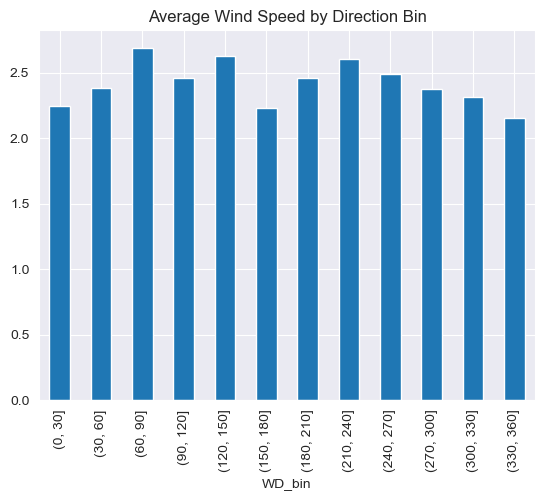

In [25]:
# Simple radial histogram (if no wind rose lib available)
togo_clean['WD_bin'] = pd.cut(togo_clean['WD'], bins=np.arange(0, 370, 30))
wind_dist = togo_clean.groupby('WD_bin', observed=True)['WS'].mean()


wind_dist.plot(kind='bar', title='Average Wind Speed by Direction Bin')


Histograms for GHI and one other variable (e.g. WS).

Text(0.5, 1.0, 'Histogram of Wind Speed')

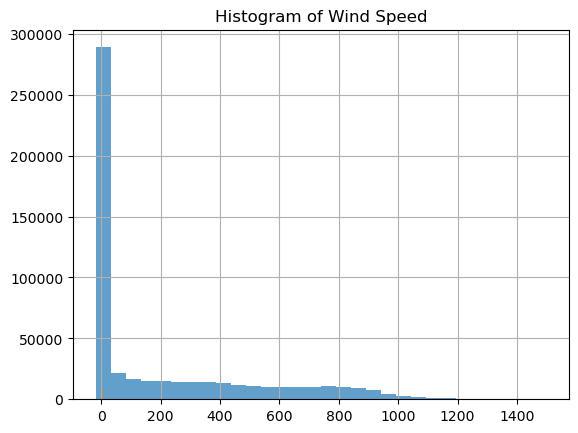

In [79]:
togo_clean['GHI'].hist(bins=30, alpha=0.7)
plt.title("Histogram of GHI")

togo_clean['WS'].hist(bins=30, alpha=0.7)
plt.title("Histogram of Wind Speed")


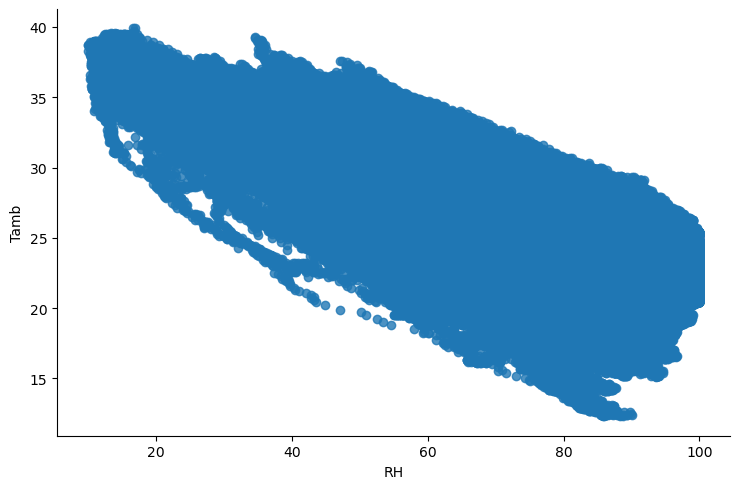

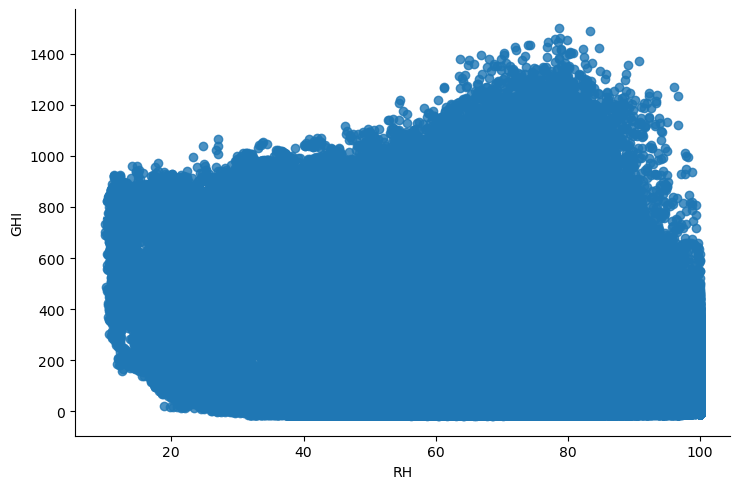

In [80]:
sns.lmplot(data=togo_clean, x='RH', y='Tamb', height=5, aspect=1.5)
sns.lmplot(data=togo_clean, x='RH', y='GHI', height=5, aspect=1.5)


Bubble chart

Text(0.5, 1.0, 'GHI vs Tamb with RH as Bubble Size')

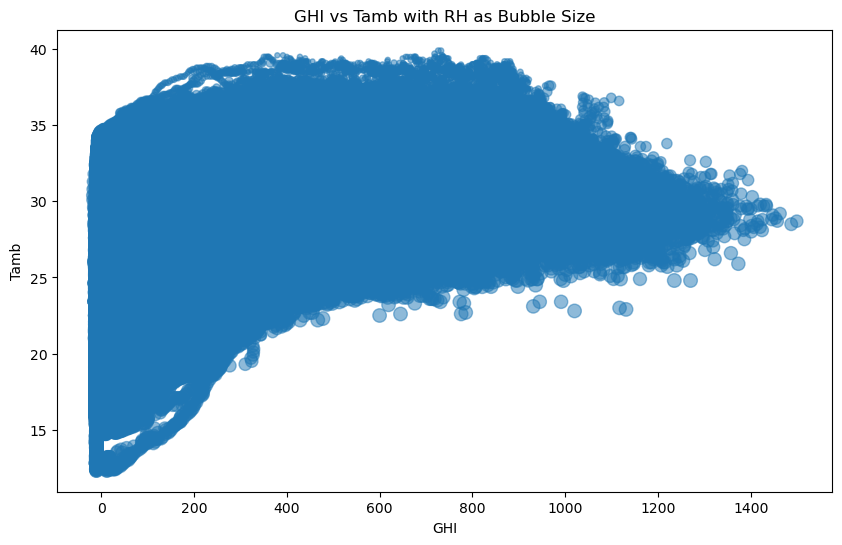

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(togo_clean['GHI'], togo_clean['Tamb'], s=togo_clean['RH'], alpha=0.5, label="RH as Bubble Size")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb with RH as Bubble Size")
